# Regressão 01 - tarefa 01/

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
# a. Carregando os pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# a. Carregando a base e criando as variáveis
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [3]:
# a. Reproduzindo a regressão
reg = smf.ols('tip ~ net_bill', data = tips).fit()

<Axes: xlabel='net_bill', ylabel='tip'>

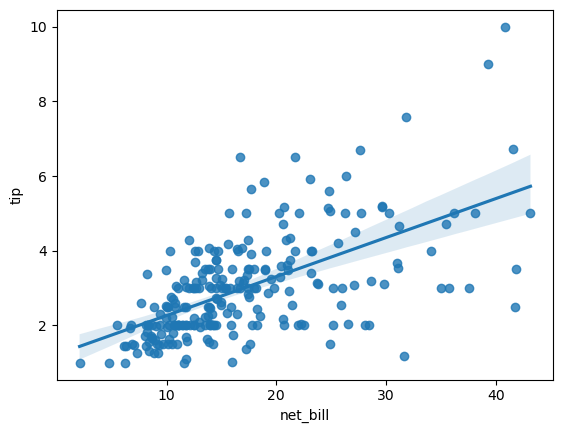

In [4]:
# b. Criando o gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [5]:
# Ajustando o modelo
reg1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()

<Axes: xlabel='net_bill', ylabel='tip_pct'>

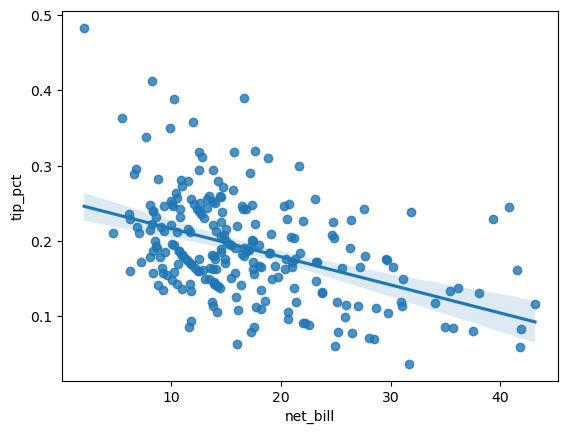

In [6]:
# Criando o gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [7]:
print("O R² é {:.2%} na regressão de tip e {:.2%} na regressão de tip_pct.".format(reg.rsquared, reg1.rsquared))

O R² é 33.25% na regressão de tip e 9.13% na regressão de tip_pct.


**Comentário**: A comparação entre o R² das duas regressões indica que a variável "net_bill" tem mais a explicar sobre o comportamento de "tip" do que de "tip_pct". Ou seja: Quanto maior a conta líquida (net_bill), geralmente maior a gorjeta (tip), mas não necessariamente maior a porcentagem da gorjeta (tip_pct).

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [8]:
# 1. Obtenha o valor predito para tip_pct:
reg1.fittedvalues

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [9]:
# 2. Obtenha o valor predito para tip

#Calculando
df = pd.DataFrame()
df['tip_pct_pred'] = reg1.fittedvalues
df['net_bill'] = tips.net_bill
df['tip_pred'] = df['tip_pct_pred'] * df['net_bill']

#Exibindo
df['tip_pred'].to_frame()

,tip_pred
0,3.309254
1,2.186938
2,3.461450
3,3.668785
4,3.699998
...,...
239,3.773120
240,3.790751
241,3.684707
242,3.319003


In [10]:
# 3. calcule o do R² para tip

df2 = pd.DataFrame()
df2['yi'] = tips.tip
df2['y^'] = df['tip_pred']
df2['(yi - y^)²'] = (df2['yi'] -df2['y^'])**2
df2['(yi - y_barra)²'] = (df2['yi'] - df2['yi'].mean())**2

SQM = df2['(yi - y^)²'].sum()
SQT = df2['(yi - y_barra)²'].sum()

R2 = 1-(SQM/SQT)
R2

0.1088997484546137

In [11]:
# 4. compare esse com o do item 1
print("O R² de tip é {:.2%} na regressão direta por tip e {:.2%} na regressão para estimar tip_pct.".format(reg.rsquared, R2))

O R² de tip é 33.25% na regressão direta por tip e 10.89% na regressão para estimar tip_pct.


Ou seja, se usamos um modelo de regressão linear simples para estimar tip, conseguimos estimar parâmetros melhores para conectar tip com net_bill do que se fazemos isso 'passando por' tip_pct primeiro.